In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit 

#Generates Number of Stars in each Frame [p(D)], of which there are len(D)
def Pixels(D, p_0):
    p=[None]*len(D)
    i=0
    while i< len(D):
        p[i] = p_0*(D[i]/D[0])**2
        i += 1
    return p

#Generates a D length array, where each entry has p random coordinates corresponding to the location of stars
#of a given frame of distance D
def Distribution(D, p, slength):
    output = [None]*len(D)
    i = 0
    while i < len(D):
        parent = [None]*2
        x = np.random.uniform(0, slength, int(p[i]))
        y = np.random.uniform(0, slength, int(p[i]))
        parent[0] = x
        parent[1] = y
        output[i] = parent
        i += 1
    return output

initp_0 = 2
Distance = np.arange(1, 100, 2)
pin = Pixels(Distance, initp_0)   
test = Distribution(Distance, pin, 2)

In [12]:
def nstars(lst_all, slength):
    n_pixel = slength**2 * 2 
    output = [None]*len(lst_all)
    i = 0
    while i < len(lst_all):
        output[i] = len(lst_all[i][0])/n_pixel
        i += 1
    return output

def fluxStdv(lst_all, slength, D):
    variance = nstars(lst_all, slength)
    flux = [None]*len(D)
    i = 0
    while i < len(D):
        flux[i] = 1/(D[i]/D[0])**2
        i += 1
    return flux*np.sqrt(variance)

print(fluxStdv(test, 2, Distance))
print(nstars(test, 2))

[0.5        0.16666667 0.1        0.07142857 0.05555556 0.04545455
 0.03846154 0.03333333 0.02941176 0.02631579 0.02380952 0.02173913
 0.02       0.01851852 0.01724138 0.01612903 0.01515152 0.01428571
 0.01351351 0.01282051 0.01219512 0.01162791 0.01111111 0.0106383
 0.01020408 0.00980392 0.00943396 0.00909091 0.00877193 0.00847458
 0.00819672 0.00793651 0.00769231 0.00746269 0.00724638 0.00704225
 0.00684932 0.00666667 0.00649351 0.00632911 0.00617284 0.0060241
 0.00588235 0.00574713 0.00561798 0.00549451 0.00537634 0.00526316
 0.00515464 0.00505051]
[0.25, 2.25, 6.25, 12.25, 20.25, 30.25, 42.25, 56.25, 72.25, 90.25, 110.25, 132.25, 156.25, 182.25, 210.25, 240.25, 272.25, 306.25, 342.25, 380.25, 420.25, 462.25, 506.25, 552.25, 600.25, 650.25, 702.25, 756.25, 812.25, 870.25, 930.25, 992.25, 1056.25, 1122.25, 1190.25, 1260.25, 1332.25, 1406.25, 1482.25, 1560.25, 1640.25, 1722.25, 1806.25, 1892.25, 1980.25, 2070.25, 2162.25, 2256.25, 2352.25, 2450.25]


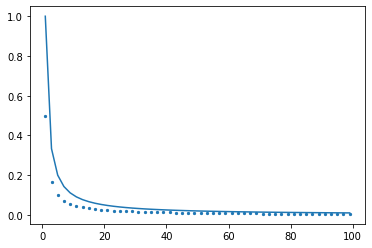

In [15]:
plt.scatter(Distance, fluxStdv(test, 2, Distance), s = 5)
plt.plot(Distance, 1/Distance)